In [9]:
import warnings
warnings.filterwarnings('ignore')

# Dataset Creation

In [19]:
import pandas as pd
import numpy as np
import random

# Number of samples
n_samples = 1000

# Generate random ticket IDs
ticket_ids = range(10001, 10001 + n_samples)

# Dummy customer texts (just for illustration, in a real-world scenario these will be more diverse and meaningful)
customer_texts = [
    "I can't log into my account.",
    "The application is crashing frequently.",
    "How do I reset my password?",
    "The system is too slow.",
    "Data is not syncing across devices.",
    "I received a wrong bill.",
    "The UI is not user-friendly.",
    "My payment got declined.",
    "I am facing issues with the new update.",
    "How do I backup my data?"
]

# Randomly assign customer texts to ticket IDs
texts = [random.choice(customer_texts) for _ in range(n_samples)]

# Severity levels
severities = ["low", "medium", "high", "critical"]

# Randomly assign severity levels to ticket IDs
severity_labels = [random.choice(severities) for _ in range(n_samples)]

# Create a DataFrame
df = pd.DataFrame({
    "ticket_id": ticket_ids,
    "customer_text": texts,
    "severity": severity_labels
})

df.head()


ticket_id                            customer_text  severity
0      10001  The application is crashing frequently.       low
1      10002              How do I reset my password?  critical
2      10003             I can't log into my account.       low
3      10004      Data is not syncing across devices.      high
4      10005                 My payment got declined.  critical

# Text cleaning or Text Pre-processing

In [11]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from langdetect import detect

# Download necessary resources for NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # 2. Convert to lowercase
    text = text.lower()
    
    # 7. Remove HTML tags
    clean = re.compile('<.*?>')
    text = re.sub(clean, '', text)
    
    # 9. Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # 8. Remove special characters (excluding space)
    text = re.sub(r'[^a-z\s]', '', text)
    
    # 10. Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # 3. Tokenize
    tokens = word_tokenize(text)
    
    # 1. Stopword removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # 4. Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # 5. Lemmatizing
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # 11. Remove extra whitespaces
    text = " ".join(tokens)
    
    # 12. Sentence segmentation
    sentences = sent_tokenize(text)
    
    # 13. Language detection (just an example, you might need a more robust solution)
    lang = detect(text)
    
    # 14. Code switching detection (not implementing as it's quite involved and requires additional tools)
    # 15. N-gram generation (example for bigrams; you can adjust for other n-grams)
    bigrams = list(nltk.bigrams(tokens))
    
    # 16. Noise reduction (not implementing as it's specific to the dataset and might need manual rules)
    
    # Rejoining cleaned tokens to form the cleaned text
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text, lang, bigrams

# Example:
text = "Your sample text with <html> tags </html> and https://example.com URLs."
cleaned_text, detected_lang, generated_bigrams = preprocess_text(text)

print(f"Cleaned Text: {cleaned_text}")
print(f"Detected Language: {detected_lang}")
print(f"Generated Bigrams: {generated_bigrams}")


Cleaned Text: sampl text tag url
Detected Language: sv
Generated Bigrams: [('sampl', 'text'), ('text', 'tag'), ('tag', 'url')]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator.DESKTOP-
[nltk_data]     QSF3VEN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator.DESKTOP-
[nltk_data]     QSF3VEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator.DESKTOP-
[nltk_data]     QSF3VEN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
# Assuming the function preprocess_text is already defined as above and df is our dataframe

# Applying the function to our dataframe's "complaints" column
df['customer_text'] = df['customer_text'].apply(lambda x: preprocess_text(x)[0])

# If you're interested in capturing detected language and bigrams as well:
df['detected_lang'] = df['customer_text'].apply(lambda x: preprocess_text(x)[1])
df['bigrams'] = df['customer_text'].apply(lambda x: preprocess_text(x)[2])

df.head()

ticket_id          customer_text  severity detected_lang  \
0      10001       cant log account       low            en   
1      10002            backup data      high            id   
2      10003    face issu new updat    medium            en   
3      10004    face issu new updat      high            en   
4      10005  applic crash frequent  critical            en   

                                     bigrams  
0              [(cant, log), (log, account)]  
1                           [(backup, data)]  
2  [(face, issu), (issu, new), (new, updat)]  
3  [(face, issu), (issu, new), (new, updat)]  
4       [(applic, crash), (crash, frequent)]

# EDA for Supervised Text Classification

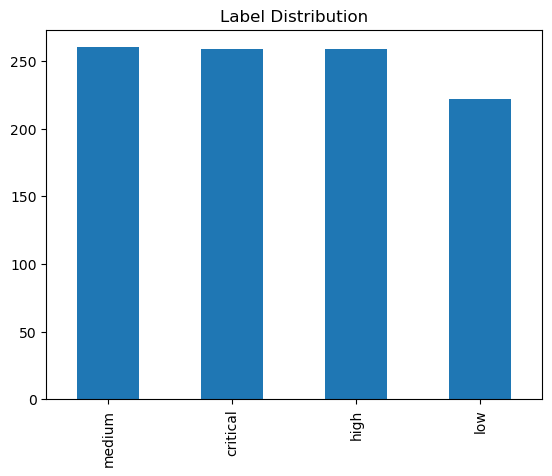

In [39]:
# 1. Label Distribution

import seaborn as sns
import matplotlib.pyplot as plt

df['severity'].value_counts().plot(kind='bar')
plt.title('Label Distribution')
plt.show()

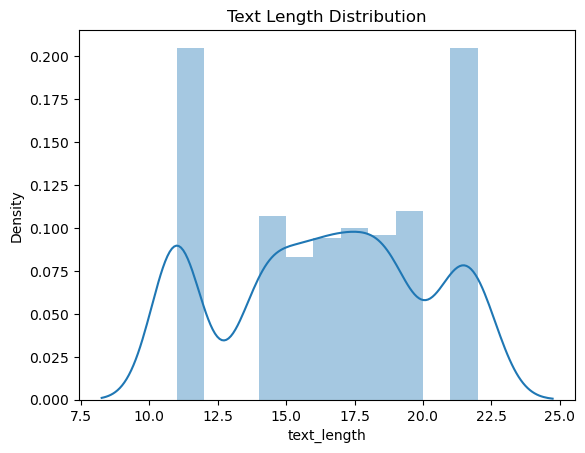

In [14]:
#2 Text Length Distributions

df['text_length'] = df['customer_text'].apply(len)
sns.distplot(df['text_length'])
plt.title('Text Length Distribution')
plt.show()


In [15]:
# Most Least Frequent Words
from collections import Counter

all_words = ' '.join(df['customer_text']).split()
word_freq = Counter(all_words)
print("Most Common Words:", word_freq.most_common(10))
print("Least Common Words:", word_freq.most_common()[:-10-1:-1])


Most Common Words: [('data', 226), ('backup', 118), ('face', 110), ('issu', 110), ('new', 110), ('updat', 110), ('sync', 108), ('across', 108), ('devic', 108), ('reset', 107)]
Least Common Words: [('userfriendli', 83), ('ui', 83), ('slow', 87), ('system', 87), ('account', 94), ('log', 94), ('cant', 94), ('declin', 96), ('got', 96), ('payment', 96)]


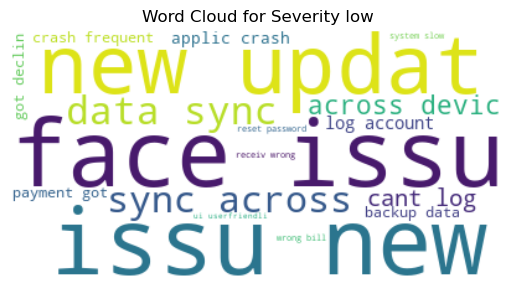

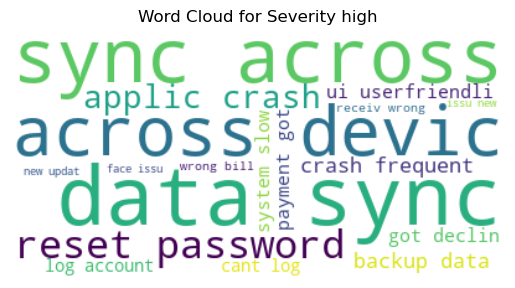

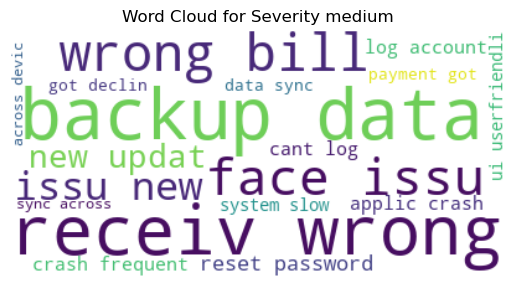

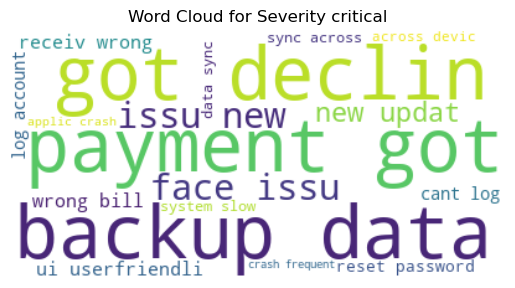

In [16]:
#word clouds for Each Label
from wordcloud import WordCloud

for label in df['severity'].unique():
    subset = df[df['severity'] == label]
    all_text = ' '.join(subset['customer_text'])
    wordcloud = WordCloud(background_color='white').generate(all_text)
    plt.figure()
    plt.title(f"Word Cloud for Severity {label}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


In [17]:
# N-gram ANalysis

from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(text, n, k):
    vec = CountVectorizer(ngram_range=(n, n)).fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:k]

print("Top 10 bigrams:", get_top_ngrams(df['customer_text'], 2, 10))


Top 10 bigrams: [('backup data', 118), ('face issu', 110), ('issu new', 110), ('new updat', 110), ('data sync', 108), ('sync across', 108), ('across devic', 108), ('reset password', 107), ('receiv wrong', 100), ('wrong bill', 100)]


In [20]:
# Tf-IDF values
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['customer_text'])
indices = np.argsort(vectorizer.idf_)[::-1]
features = vectorizer.get_feature_names_out()
top_n = 10
top_features = [features[i] for i in indices[:top_n]]
print("Top TF-IDF terms:", top_features)


Top TF-IDF terms: ['password', 'reset', 'too', 'system', 'slow', 'declined', 'got', 'payment', 'wrong', 'bill']


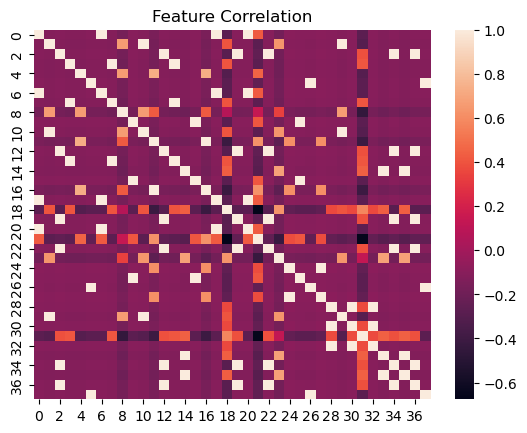

In [21]:
#correlation between features

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['customer_text']).toarray()
corr_matrix = np.corrcoef(X, rowvar=0)
sns.heatmap(corr_matrix)
plt.title('Feature Correlation')
plt.show()


In [32]:
# Part of Speech Taggin - POS

import nltk
nltk.download('averaged_perceptron_tagger')

import nltk
from nltk.tokenize import word_tokenize

# Tokenizing the text
df['tokens'] = df['customer_text'].apply(word_tokenize)

# Apply POS tagging
df['pos_tags'] = df['tokens'].apply(nltk.pos_tag)

# Example to show the tags of the first ticket
print(df['pos_tags'].iloc[0])


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Administrator.DESKTOP-
[nltk_data]     QSF3VEN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


[('The', 'DT'), ('application', 'NN'), ('is', 'VBZ'), ('crashing', 'VBG'), ('frequently', 'RB'), ('.', '.')]


In [35]:
# #Named Entity Recognition
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.chunk import ne_chunk

# Applying NER
def named_entity_recognition(pos_tags):
    tree = ne_chunk(pos_tags)
    named_entities = []
    for subtree in tree:
        if isinstance(subtree, nltk.Tree):
            entity_name = " ".join([word for word, tag in subtree.leaves()])
            entity_type = subtree.label()
            named_entities.append((entity_name, entity_type))
    return named_entities

df['named_entities'] = df['pos_tags'].apply(named_entity_recognition)

# Example to show the named entities of the first ticket
print(df['named_entities'].iloc[0])


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Administrator.DESKTOP-
[nltk_data]     QSF3VEN\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Administrator.DESKTOP-
[nltk_data]     QSF3VEN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


[]


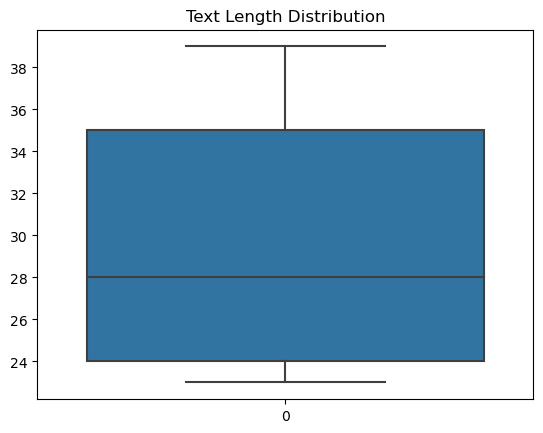

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add a new column 'text_length' to the dataframe
df['text_length'] = df['customer_text'].apply(len)

# Visualize the distribution of text length using a boxplot
sns.boxplot(df['text_length'])
plt.title('Text Length Distribution')
plt.show()


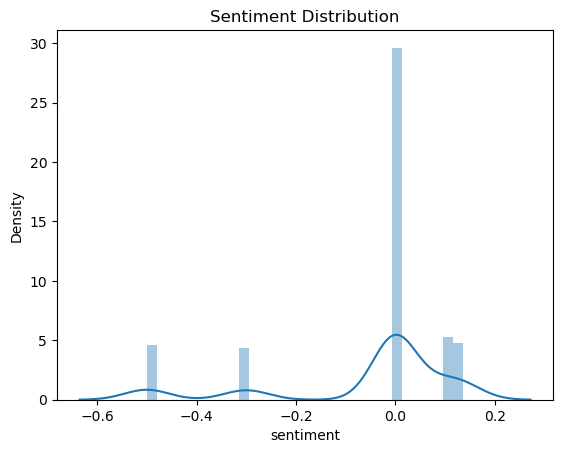

In [28]:
# sentiment Analysis 

from textblob import TextBlob

df['sentiment'] = df['customer_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
sns.distplot(df['sentiment'])
plt.title('Sentiment Distribution')
plt.show()


# Word Vectors -- Preparing Data to be injested into ML Models

# Count Vectorizer - Bag of Words

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the count vectorizer
count_vectorizer = CountVectorizer()

# Transform the customer text data
X_count = count_vectorizer.fit_transform(df['customer_text'])

# This will give you a sparse matrix. You can convert it to an array or dataframe if needed:
# X_count_array = X_count.toarray()


In [41]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the count vectorizer
count_vectorizer = CountVectorizer()

# Transform the customer text data
X_count = count_vectorizer.fit_transform(df['customer_text'])


In [42]:
from sklearn.model_selection import train_test_split

# Assuming 'severity' is your target column
y = df['severity']

X_train, X_test, y_train, y_test = train_test_split(X_count, y, test_size=0.2, random_state=42)


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.255

Classification Report:
               precision    recall  f1-score   support

    critical       0.25      0.48      0.33        48
        high       0.00      0.00      0.00        57
         low       0.30      0.15      0.20        47
      medium       0.24      0.44      0.31        48

    accuracy                           0.26       200
   macro avg       0.20      0.27      0.21       200
weighted avg       0.19      0.26      0.20       200



In [44]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the model
nb = MultinomialNB()

# Train the model
nb.fit(X_train, y_train)

# Predictions
y_pred_nb = nb.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Accuracy: 0.24

Classification Report:
               precision    recall  f1-score   support

    critical       0.25      0.48      0.33        48
        high       0.00      0.00      0.00        57
         low       0.28      0.26      0.27        47
      medium       0.20      0.27      0.23        48

    accuracy                           0.24       200
   macro avg       0.18      0.25      0.21       200
weighted avg       0.17      0.24      0.20       200



# Fine Tuning: 

In [45]:
# Hyperparameter tuning (e.g., GridSearchCV, RandomizedSearchCV)
# Including bi-grams or tri-grams in CountVectorizer (using the ngram_range parameter)
# Using techniques like SMOTE for imbalanced datasets, if applicable.